#Movie Recommendation System

#Objective:
The primary objective of this project is to develop a movie recommendation system that leverages machine learning techniques to provide personalized movie suggestions for users. By analyzing user preferences, ratings, and other relevant data, the system aims to improve user satisfaction by recommending movies they are likely to enjoy. This project will explore collaborative filtering, content-based filtering, or hybrid approaches to optimize recommendation accuracy, leveraging algorithms such as k-nearest neighbors, matrix factorization, and neural networks.

#Data Source:
The dataset utilized for the movie recommendation system is a structured CSV file comprising a detailed range of information about movies. It includes unique identifiers, movie titles, genres, original languages, financial metrics (like budget and revenue), popularity scores, release dates, user ratings, keywords, summaries, and production details. It also covers cast and crew information, including directors and other key contributors. This comprehensive dataset provides a rich foundation for building and refining recommendation models, allowing for in-depth analysis of movie attributes and user preferences, as well as industry trends. Such a dataset supports both content-based and collaborative filtering approaches, making it suitable for personalized recommendations that can adapt to varying user interests and preferences.


#Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step-1:Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/refs/heads/main/Movies%20Recommendation.csv')

# Step-2:Display the first few rows
print(df.head())


   Movie_ID      Movie_Title                       Movie_Genre Movie_Language  \
0         1       Four Rooms                      Crime Comedy             en   
1         2        Star Wars  Adventure Action Science Fiction             en   
2         3     Finding Nemo                  Animation Family             en   
3         4     Forrest Gump              Comedy Drama Romance             en   
4         5  American Beauty                             Drama             en   

   Movie_Budget  Movie_Popularity Movie_Release_Date  Movie_Revenue  \
0       4000000         22.876230         09-12-1995        4300000   
1      11000000        126.393695         25-05-1977      775398007   
2      94000000         85.688789         30-05-2003      940335536   
3      55000000        138.133331         06-07-1994      677945399   
4      15000000         80.878605         15-09-1999      356296601   

   Movie_Runtime  Movie_Vote  ...  \
0           98.0         6.5  ...   
1          1

#Describe Data

In [ ]:
#Step-3: Dispaly the Metaadata about given data
print(df.describe())

          Movie_ID  Movie_Budget  Movie_Popularity  Movie_Revenue  \
count  4760.000000  4.760000e+03       4760.000000   4.760000e+03   
mean   2382.566387  2.920129e+07         21.599510   8.263743e+07   
std    1377.270159  4.075620e+07         31.887919   1.630554e+08   
min       1.000000  0.000000e+00          0.000372   0.000000e+00   
25%    1190.750000  9.257500e+05          4.807074   0.000000e+00   
50%    2380.500000  1.500000e+07         13.119058   1.944716e+07   
75%    3572.250000  4.000000e+07         28.411929   9.341276e+07   
max    4788.000000  3.800000e+08        875.581305   2.787965e+09   

       Movie_Runtime   Movie_Vote  Movie_Vote_Count  
count    4758.000000  4760.000000       4760.000000  
mean      107.184111     6.113866        692.508403  
std        21.960332     1.141294       1235.007337  
min         0.000000     0.000000          0.000000  
25%        94.000000     5.600000         55.000000  
50%       104.000000     6.200000        238.000000  


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4760 entries, 0 to 4759
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Movie_ID                  4760 non-null   int64  
 1   Movie_Title               4760 non-null   object 
 2   Movie_Genre               4760 non-null   object 
 3   Movie_Language            4760 non-null   object 
 4   Movie_Budget              4760 non-null   int64  
 5   Movie_Popularity          4760 non-null   float64
 6   Movie_Release_Date        4760 non-null   object 
 7   Movie_Revenue             4760 non-null   int64  
 8   Movie_Runtime             4758 non-null   float64
 9   Movie_Vote                4760 non-null   float64
 10  Movie_Vote_Count          4760 non-null   int64  
 11  Movie_Homepage            1699 non-null   object 
 12  Movie_Keywords            4373 non-null   object 
 13  Movie_Overview            4757 non-null   object 
 14  Movie_Pr

In [ ]:
print(df.isnull().sum())

Movie_ID                       0
Movie_Title                    0
Movie_Genre                    0
Movie_Language                 0
Movie_Budget                   0
Movie_Popularity               0
Movie_Release_Date             0
Movie_Revenue                  0
Movie_Runtime                  2
Movie_Vote                     0
Movie_Vote_Count               0
Movie_Homepage              3061
Movie_Keywords               387
Movie_Overview                 3
Movie_Production_House         0
Movie_Production_Country       0
Movie_Spoken_Language          0
Movie_Tagline                818
Movie_Cast                    27
Movie_Crew                     0
Movie_Director                22
dtype: int64


In [ ]:
df.columns

Index(['Movie_ID', 'Movie_Title', 'Movie_Genre', 'Movie_Language',
       'Movie_Budget', 'Movie_Popularity', 'Movie_Release_Date',
       'Movie_Revenue', 'Movie_Runtime', 'Movie_Vote', 'Movie_Vote_Count',
       'Movie_Homepage', 'Movie_Keywords', 'Movie_Overview',
       'Movie_Production_House', 'Movie_Production_Country',
       'Movie_Spoken_Language', 'Movie_Tagline', 'Movie_Cast', 'Movie_Crew',
       'Movie_Director'],
      dtype='object')

#Data Visualization

#Top Movies by Revenue:

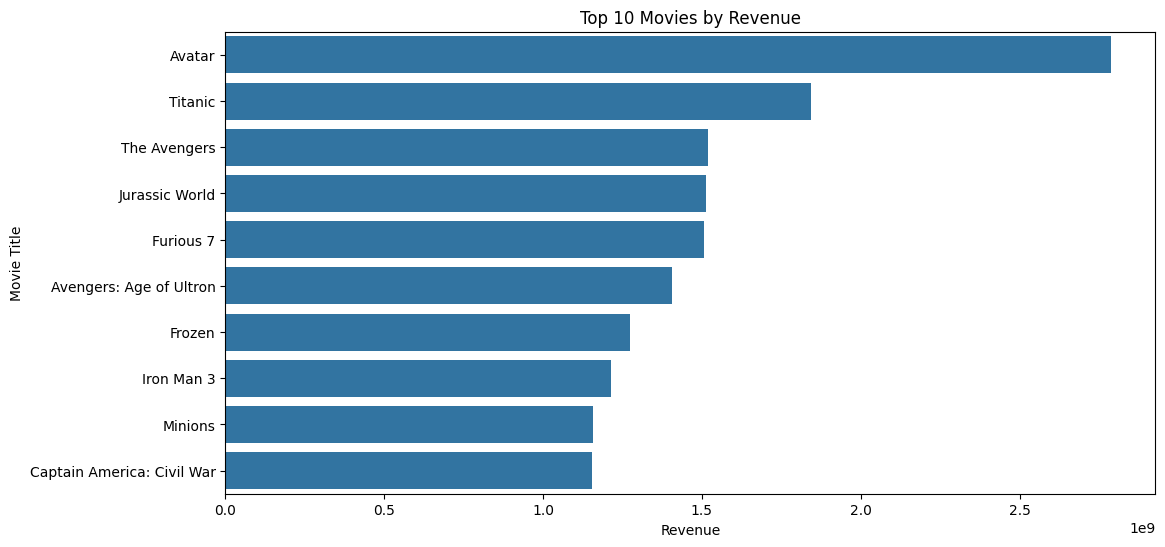

In [ ]:
#Step-4:Visualzation of data to clearly understand it
import matplotlib.pyplot as plt
import seaborn as sns
top_movies = df.nlargest(10, 'Movie_Revenue')
plt.figure(figsize=(12, 6))
sns.barplot(x='Movie_Revenue', y='Movie_Title', data=top_movies)
plt.title('Top 10 Movies by Revenue')
plt.xlabel('Revenue')
plt.ylabel('Movie Title')
plt.show()

#Popularity of Movies Over Time:

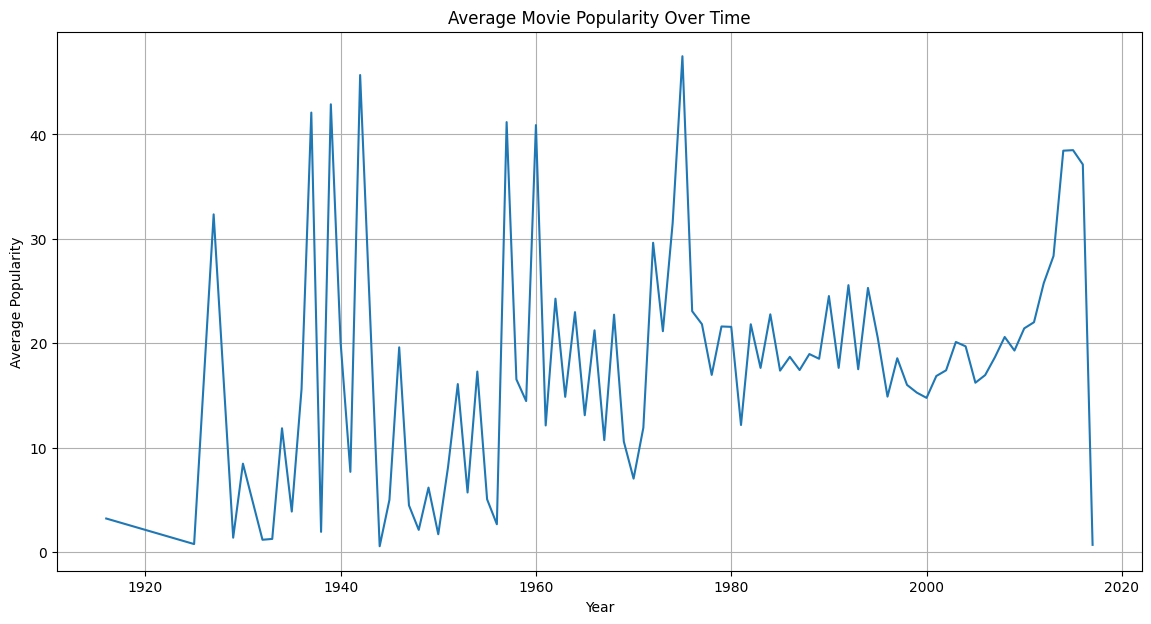

In [ ]:
df['Movie_Release_Date'] = pd.to_datetime(df['Movie_Release_Date'], format='%d-%m-%Y', errors='coerce')
plt.figure(figsize=(14, 7))
popularity_over_time = df.groupby(df['Movie_Release_Date'].dt.year)['Movie_Popularity'].mean()
popularity_over_time.plot(kind='line')
plt.title('Average Movie Popularity Over Time')
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.grid()
plt.show()

#Most Popular Genres:

<ipython-input-8-57c4020636e2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')


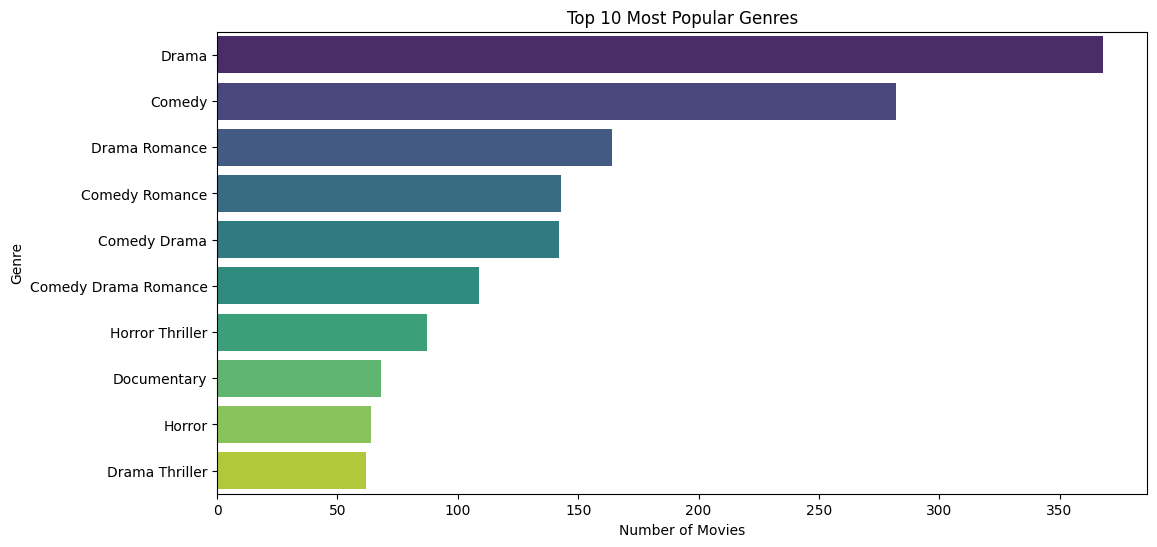

In [ ]:
plt.figure(figsize=(12, 6))
genre_counts = df['Movie_Genre'].value_counts().head(10)
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Top 10 Most Popular Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

#Data Preprocessing


In [ ]:
# Step-5:Combine text features into a single string
df_features = df[['Movie_Genre', 'Movie_Keywords', 'Movie_Cast', 'Movie_Director', 'Movie_Tagline']].fillna('')
df['Combined_Features'] = df_features['Movie_Genre'] + ' ' + df_features['Movie_Keywords'] + ' ' + df_features['Movie_Cast'] + ' ' + df_features['Movie_Tagline'] + ' ' + df_features['Movie_Director']

# Step-6:Standardize numerical features (Movie_Revenue and Movie_Popularity)
numerical_features = df[['Movie_Revenue', 'Movie_Popularity']].fillna(0)
scaler = StandardScaler()
df[['Scaled_Revenue', 'Scaled_Popularity']] = scaler.fit_transform(numerical_features)

# Step-7:Drop rows with missing 'Movie_Title'
df.dropna(subset=['Movie_Title'], inplace=True)

#Define Target Variable (y) and Feature Variables (X)

In [ ]:
# Step-8:Create target variable (using movie popularity as a classification task)
df['Label'] = (df['Movie_Popularity'] > df['Movie_Popularity'].median()).astype(int)

# Step-9:Use TF-IDF Vectorizer for text-based features
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf.fit_transform(df['Combined_Features'])

# Step-10:Combine the TF-IDF matrix with the standardized numerical features
from scipy.sparse import hstack
X = hstack([tfidf_matrix, df[['Scaled_Revenue', 'Scaled_Popularity']]])

y = df['Label']

#Train-Test Split

In [ ]:
# Step-11:Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Modeling

In [ ]:
# Step-12:Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5, metric='cosine')
knn.fit(X_train, y_train)

# Step-13:Predict on the test set
y_pred = knn.predict(X_test)

#Model Evaluation

Accuracy: 0.85
Classification Report:
               precision    recall  f1-score   support

           0       0.77      1.00      0.87       481
           1       1.00      0.70      0.82       471

    accuracy                           0.85       952
   macro avg       0.88      0.85      0.85       952
weighted avg       0.88      0.85      0.85       952



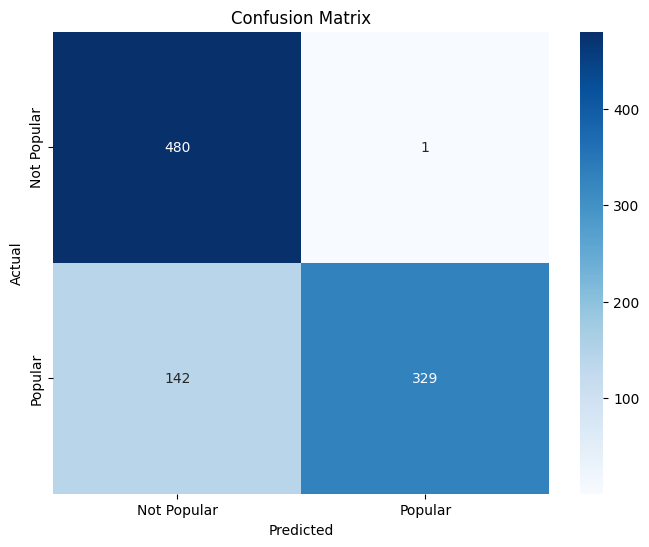

In [ ]:
# Step-14:Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['Not Popular', 'Popular'], yticklabels=['Not Popular', 'Popular'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#Prediction

#Top 10 Recommended Movies:

In [ ]:
def recommend_movies(favorite_movie_title, n_recommendations=10):
    # Find the index of the favorite movie
    matches = df[df['Movie_Title'].str.contains(favorite_movie_title, case=False, na=False)]
    if matches.empty:
        return []  # Return an empty list if the movie is not found

    movie_index = matches.index[0]

    # Convert coo_matrix to csr_matrix for indexing
    X_csr = X.tocsr()

    # Get the feature vector for the favorite movie
    movie_vector = X_csr[movie_index]

    # Calculate similarity scores using KNN
    similarity_scores = knn.kneighbors(movie_vector, n_neighbors=n_recommendations + 1)[1][0]

    # Retrieve recommended movie titles
    recommended_movie_titles = df.iloc[similarity_scores[1:]]['Movie_Title'].tolist()
    return recommended_movie_titles

# Get user's favorite movie
user_favorite_movie = input("Enter your favourite movie name:")

# Get and display recommendations
recommended_movies = recommend_movies(user_favorite_movie, n_recommendations=10)
if len(recommended_movies) > 0:
    print(f"Top 10 movies recommended for '{user_favorite_movie}':")
    for i, movie in enumerate(recommended_movies, 1):
        print(f"{i}. {movie}")
else:
    print(f"Sorry, the movie '{user_favorite_movie}' is not found in the dataset.")

Enter your favourite movie name:Star Wars
Top 10 movies recommended for 'Star Wars':
1. Dream House
2. Captain Corelli's Mandolin
3. Paint Your Wagon
4. The Flowers of War
5. Solomon and Sheba
6. Heartbeeps
7. Brooklyn Rules
8. The Last House on the Left
9. Get on the Bus
10. S.W.A.T.


#Explaination
 This project start by loading a rich dataset containing diverse movie information, including genres, cast, keywords, directors, popularity scores, and revenue. Understanding the data is crucial, so the project involves detailed exploration of the dataset. This includes describing the data structure, visualizing key trends (e.g., popular genres and high-revenue movies), and identifying any data gaps or anomalies for cleaning. Visualizations give insights into the movie landscape, such as which genres tend to be more popular and which movies are more profitable.

Preprocessing is essential to make the dataset usable for machine learning. We combine relevant text fields (like genres, keywords, and cast) into a single string for each movie. Then, numerical fields like revenue and popularity are standardized to ensure all features are on a similar scale. Using TF-IDF (Term Frequency-Inverse Document Frequency), the combined text data is transformed into a numerical format that the model can interpret, converting complex text data into quantifiable vectors for analysis.

The dataset is then split into training and testing subsets, a critical step to verify that the model generalizes well to new, unseen data. For this recommendation model, we use the K-Nearest Neighbors (KNN) algorithm, which calculates the similarity between movies based on combined features, identifying similar movies by measuring distances (like cosine similarity). The KNN model learns patterns in the data, allowing it to recommend movies based on similarities to known user preferences.

Finally, the model’s accuracy is assesseed using metrics like accuracy, confusion matrices, and classification reports to measure performance. A recommendation function is implemented, which uses the trained model to suggest similar movies based on a user’s selected film. With a mix of machine learning and text-based similarity, this project provides a data-driven recommendation system, designed to enhance user experience by delivering accurate, personalized movie suggestions.